## Saturating Forecasts
### 上限値での逓減
* 成長を予測する際には、人口などの上限値がある。
* これを`carrying capacity'(環境収容力)と呼ぶ。
* この値に近づいたら、予測値は逓減すべき。

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [2]:
df = pd.read_csv("./input/example_wp_R.csv")
df['y'] = np.log(df['y'])

In [3]:
df.head()

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797


* 'carrying capacity'は'cap'という絡むで指定する。

In [4]:
df['cap'] = 8.5

* `cap`は全行で一定の値でなくて良い。市場が成長しているなら、（例えば人口が増えているなら）、`cap`も増えて良い。

* 前回同様に予測するが、引数として、`growth`に`logistic`を指定する

In [5]:
m = Prophet(growth='logistic')
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/takizawa/dev/python/play/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


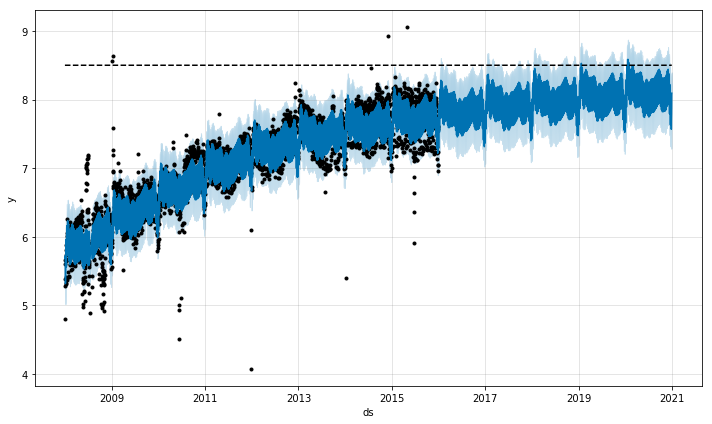

In [6]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst);

* `growth`に`logistic`を指定しない場合(デフォルト値の`linear`が指定される)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/takizawa/dev/python/play/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


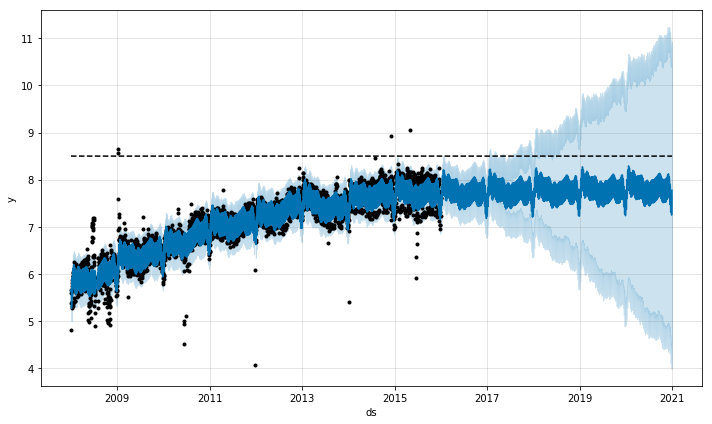

In [7]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst);

### 下限値での逓減
* `floor`で下限値を指定することもできる。

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/takizawa/dev/python/play/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


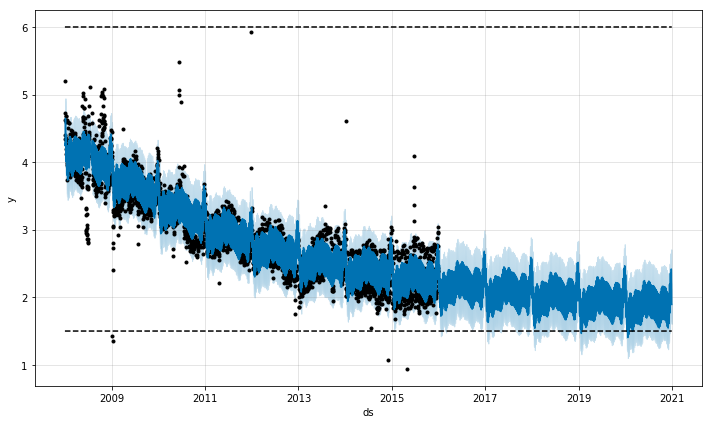

In [8]:
df['y'] = 10 - df['y']
df['cap'] = 6
df['floor'] = 1.5
future['cap'] = 6
future['floor'] = 1.5
m = Prophet(growth='logistic')
m.fit(df)
fcst = m.predict(future)
m.plot(fcst);